### Airbnb Pricing Project -- Milan

* We start with importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols

* Loading the dataset and evaluating the statistics:

In [2]:
data = pd.read_csv('listings.csv')

print(data.head())

        id                           listing_url       scrape_id last_scraped  \
0     6400     https://www.airbnb.com/rooms/6400  20230913045258   2023-09-14   
1    23986    https://www.airbnb.com/rooms/23986  20230913045258   2023-09-14   
2  1734055  https://www.airbnb.com/rooms/1734055  20230913045258   2023-09-14   
3   189441   https://www.airbnb.com/rooms/189441  20230913045258   2023-09-13   
4  2192436  https://www.airbnb.com/rooms/2192436  20230913045258   2023-09-14   

        source                                               name  \
0  city scrape  Rental unit in Milan · ★4.89 · 3 bedrooms · 1 ...   
1  city scrape  Rental unit in Milan · ★4.64 · 1 bedroom · 1 b...   
2  city scrape  Rental unit in Milan · ★4.58 · 1 bedroom · 1 b...   
3  city scrape  Loft in Milano · ★4.70 · 1 bedroom · 1 bed · 1...   
4  city scrape  Rental unit in Milan · ★4.85 · 1 bedroom · 1 b...   

                                         description  \
0  Enjoy your stay at The Studio, a light-

In [3]:
print(data.describe())

                 id     scrape_id       host_id  host_listings_count  \
count  2.417700e+04  2.417700e+04  2.417700e+04         24177.000000   
mean   3.661612e+17  2.023091e+13  1.411375e+08            29.535964   
std    4.068267e+17  6.390757e+00  1.658876e+08            92.105006   
min    6.400000e+03  2.023091e+13  8.168000e+03             0.000000   
25%    2.429624e+07  2.023091e+13  1.673053e+07             1.000000   
50%    5.159190e+07  2.023091e+13  5.284496e+07             2.000000   
75%    8.181683e+17  2.023091e+13  2.301402e+08             7.000000   
max    9.788463e+17  2.023091e+13  5.366197e+08          2534.000000   

       host_total_listings_count  neighbourhood_group_cleansed      latitude  \
count               24177.000000                           0.0  24177.000000   
mean                   37.188568                           NaN     45.471766   
std                   128.443543                           NaN      0.020954   
min                     0.00000

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24177 entries, 0 to 24176
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24177 non-null  int64  
 1   listing_url                                   24177 non-null  object 
 2   scrape_id                                     24177 non-null  int64  
 3   last_scraped                                  24177 non-null  object 
 4   source                                        24177 non-null  object 
 5   name                                          24177 non-null  object 
 6   description                                   23761 non-null  object 
 7   neighborhood_overview                         13101 non-null  object 
 8   picture_url                                   24177 non-null  object 
 9   host_id                                       24177 non-null 

* Let's proceed with omitting the unnecessary columns.

In [5]:
cols = data.columns
cols

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

### Dropping the unnecessary columns

In [6]:
drop_cols = ['id', 'listing_url', 'scrape_id', 'last_scraped','source', 'description', 'neighborhood_overview',
              'picture_url', 'host_id','host_url', 'host_name', 'host_total_listings_count','host_since',
              'host_location','host_verifications' ,'host_about','host_is_superhost' ,'host_thumbnail_url',
              'host_picture_url','host_neighbourhood', 'neighbourhood', 'neighbourhood_group_cleansed',
              'latitude', 'longitude', 'bathrooms', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
              'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
              'maximum_nights_avg_ntm', 'calendar_updated', 'availability_60', 'availability_90', 'availability_365', 
              'calendar_last_scraped', 'first_review', 'last_review', 'number_of_reviews_ltm', 'review_scores_accuracy',
              'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'number_of_reviews_l30d',
              'host_listings_count', 'review_scores_location', 'review_scores_value', 'license', 'calculated_host_listings_count',
              'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
              'calculated_host_listings_count_shared_rooms']

data = data.drop(drop_cols, axis=1)
data.shape

(24177, 21)

In [7]:
data.head()

,name,host_response_time,host_response_rate,host_acceptance_rate,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,...,bedrooms,beds,amenities,price,has_availability,availability_30,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month
0,Rental unit in Milan · ★4.89 · 3 bedrooms · 1 ...,NaN,NaN,0%,t,f,TIBALDI,Private room in rental unit,Private room,1,...,NaN,1.0,"[""Washer"", ""Kitchen"", ""Paid parking on premise...",$100.00,t,23,12,4.89,f,0.07
1,Rental unit in Milan · ★4.64 · 1 bedroom · 1 b...,within a day,100%,56%,t,t,NAVIGLI,Entire rental unit,Entire home/apt,4,...,1.0,1.0,"[""Hot water"", ""Washer"", ""Bed linens"", ""Extra p...",$150.00,t,23,26,4.64,f,0.19
2,Rental unit in Milan · ★4.58 · 1 bedroom · 1 b...,within a day,100%,50%,t,t,SARPI,Entire rental unit,Entire home/apt,2,...,1.0,1.0,"[""Dishwasher"", ""Heating"", ""Hangers"", ""Dryer"", ...",$171.00,t,24,20,4.58,f,0.20
3,Loft in Milano · ★4.70 · 1 bedroom · 1 bed · 1...,within an hour,100%,89%,t,t,BOVISASCA,Private room in loft,Private room,1,...,1.0,1.0,"[""HDTV with Netflix"", ""Dishwasher"", ""Heating"",...",$40.00,t,13,142,4.70,f,1.00
4,Rental unit in Milan · ★4.85 · 1 bedroom · 1 b...,within an hour,100%,75%,t,t,TORTONA,Entire rental unit,Entire home/apt,2,...,1.0,1.0,"[""Heating"", ""Shower gel"", ""Hangers"", ""Room-dar...",$94.00,t,1,169,4.85,t,1.47


### Checking for missing values:

In [8]:
# Data Cleaning
# check for missing values
data.isnull().sum()

name                         0
host_response_time        6180
host_response_rate        6180
host_acceptance_rate      4322
host_has_profile_pic         0
host_identity_verified       0
neighbourhood_cleansed       0
property_type                0
room_type                    0
accommodates                 0
bathrooms_text               8
bedrooms                  5430
beds                       289
amenities                    0
price                        0
has_availability             0
availability_30              0
number_of_reviews            0
review_scores_rating      4781
instant_bookable             0
reviews_per_month         4781
dtype: int64

* It seems that there are a lot of missing values for number of the "bedrooms" which could be an important feature. 
* The good point is that we can extract the number of bedrooms from the column "name". 

In [9]:
# Extracting number of bedrooms from the name column
data['num_bedrooms'] = data['name'].str.extract('(\d+) bedroom', expand=True)

# checking for missing values in the new column
data['num_bedrooms'].isnull().sum()

1452

* Since the number of missing values for the new column is less than the previous column, we can replace the missing value of the original column with the new feature values.

In [10]:
# Replacing the missing values in column "bedrooms" with the values in column "num_bedrooms"
data['bedrooms'] = data['bedrooms'].fillna(data['num_bedrooms'])

# checking for missing values in the "bedrooms" column
data['bedrooms'].isnull().sum()

1452

In [11]:
# dropping the "num_bedrooms" column
data = data.drop('num_bedrooms', axis=1)

In [12]:
# dropping the rows with missing values in the "bedrooms" column
data = data.dropna(subset=['bedrooms'])

* It does not seem that these 3 variables are very esseintial to our model: "host_response_time", "host_response_rate", "host_acceptance_rate".
* Considering the number of missing values for these columns, a trivial choice is to drop them as well. 

In [13]:
# Dropping the columns: "host_response_time", "host_response_rate", "host_acceptance_rate"
data = data.drop(['host_response_time', 'host_response_rate', 'host_acceptance_rate'], axis=1)

In [14]:
# dropping the rows with missing values in the "beds" and "bathrooms_text" columns
data = data.dropna(subset=['beds', 'bathrooms_text'])

* A closer look to the data shows that, the 0 ratings could be equivalent to missing values. 
* If the number of these observations is limited, we can drop them all. Otherwise we need to replace them with the mean.

In [15]:
# Checking for the number of observations with review_scores_rating = 0
data[data['review_scores_rating'] == 0].shape

(145, 18)

In [16]:
# dropping the rows with review_scores_rating = 0
data = data[data['review_scores_rating'] != 0]

In [17]:
# checking the statistics of the "review_scores_rating" column
data['review_scores_rating'].describe()

count    17846.000000
mean         4.691283
std          0.460223
min          1.000000
25%          4.600000
50%          4.830000
75%          5.000000
max          5.000000
Name: review_scores_rating, dtype: float64

* It seems plausible to replace the missing values with the mean.

In [18]:
# replacing the missing values in the "review_scores_rating" column with the mean
data['review_scores_rating'] = data['review_scores_rating'].fillna(data['review_scores_rating'].mean())

# replacing the missing values in the "reviews_per_month" column with the mean
data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].mean())

In [19]:
data.isnull().sum()

name                      0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood_cleansed    0
property_type             0
room_type                 0
accommodates              0
bathrooms_text            0
bedrooms                  0
beds                      0
amenities                 0
price                     0
has_availability          0
availability_30           0
number_of_reviews         0
review_scores_rating      0
instant_bookable          0
reviews_per_month         0
dtype: int64

In [20]:
# Dropping the column "name" - we have extracted all the information we need from it
data = data.drop('name', axis=1)

### Encoding Categorical Variables

In [21]:
# Checking the data types of the columns
data.dtypes

host_has_profile_pic       object
host_identity_verified     object
neighbourhood_cleansed     object
property_type              object
room_type                  object
accommodates                int64
bathrooms_text             object
bedrooms                   object
beds                      float64
amenities                  object
price                      object
has_availability           object
availability_30             int64
number_of_reviews           int64
review_scores_rating      float64
instant_bookable           object
reviews_per_month         float64
dtype: object

* These variables are categorical and need to be converted: 
"host_has_profile_pic", "host_identity_verified", 'neighbourhood_cleansed', 'property_type', 'room_type', 'has_availability', 'instant_bookable'

In [22]:
# Converting the above columns to categorical variables
data['host_has_profile_pic'] = data['host_has_profile_pic'].astype('category')
data['host_identity_verified'] = data['host_identity_verified'].astype('category')
data['neighbourhood_cleansed'] = data['neighbourhood_cleansed'].astype('category')
data['room_type'] = data['room_type'].astype('category')
data['has_availability'] = data['has_availability'].astype('category')
data['instant_bookable'] = data['instant_bookable'].astype('category')
data['property_type'] = data['property_type'].astype('category')

In [23]:
data.head()

,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,has_availability,availability_30,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month
0,t,f,TIBALDI,Private room in rental unit,Private room,1,3.5 baths,3,1.0,"[""Washer"", ""Kitchen"", ""Paid parking on premise...",$100.00,t,23,12,4.89,f,0.07
1,t,t,NAVIGLI,Entire rental unit,Entire home/apt,4,1 bath,1.0,1.0,"[""Hot water"", ""Washer"", ""Bed linens"", ""Extra p...",$150.00,t,23,26,4.64,f,0.19
2,t,t,SARPI,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Dishwasher"", ""Heating"", ""Hangers"", ""Dryer"", ...",$171.00,t,24,20,4.58,f,0.20
3,t,t,BOVISASCA,Private room in loft,Private room,1,1 shared bath,1.0,1.0,"[""HDTV with Netflix"", ""Dishwasher"", ""Heating"",...",$40.00,t,13,142,4.70,f,1.00
4,t,t,TORTONA,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Heating"", ""Shower gel"", ""Hangers"", ""Room-dar...",$94.00,t,1,169,4.85,t,1.47


In [24]:
data.dtypes

host_has_profile_pic      category
host_identity_verified    category
neighbourhood_cleansed    category
property_type             category
room_type                 category
accommodates                 int64
bathrooms_text              object
bedrooms                    object
beds                       float64
amenities                   object
price                       object
has_availability          category
availability_30              int64
number_of_reviews            int64
review_scores_rating       float64
instant_bookable          category
reviews_per_month          float64
dtype: object

* These 3 columns need to be converted to numeric type: "bathrooms_text", "bedrooms", "price"

In [25]:
data['bathrooms_text'].head()

0        3.5 baths
1           1 bath
2           1 bath
3    1 shared bath
4           1 bath
Name: bathrooms_text, dtype: object

In [26]:
# Extracting the number of bathrooms from the "bathrooms_text" column
data['bathrooms'] = data['bathrooms_text'].str.extract('(\d+) ', expand=True)

# Converting the "bathrooms" column to numeric
data['bathrooms'] = pd.to_numeric(data['bathrooms'])

# Dropping the "bathrooms_text" column
data = data.drop('bathrooms_text', axis=1)

# Converting the "bedrooms" column to numeric
data['bedrooms'] = pd.to_numeric(data['bedrooms'])

In [27]:
data['price'].head()

0    $100.00
1    $150.00
2    $171.00
3     $40.00
4     $94.00
Name: price, dtype: object

In [28]:
# Extracting the numberic part from the "price" column
data['price'] = data['price'].str.replace('$', '')
data['price'] = data['price'].str.replace(',', '')
data['price'] = pd.to_numeric(data['price'])

C:\Users\PA\AppData\Local\Temp\ipykernel_13992\528802465.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = data['price'].str.replace('$', '')


In [29]:
data.shape

(22307, 17)

In [30]:
# Convering the categorical variables to dummy variables
data = pd.get_dummies(data, columns= ['host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'room_type', 'has_availability','instant_bookable', 'property_type'] ,drop_first=True)

In [31]:
# Store the cleaned data in a new dataframe
data_cleaned = data.copy()

data.shape

(22307, 153)

* The "amenities" column include several strings which every one of them can be considered as a dummy.

In [32]:
data['amenities'].head()

0    ["Washer", "Kitchen", "Paid parking on premise...
1    ["Hot water", "Washer", "Bed linens", "Extra p...
2    ["Dishwasher", "Heating", "Hangers", "Dryer", ...
3    ["HDTV with Netflix", "Dishwasher", "Heating",...
4    ["Heating", "Shower gel", "Hangers", "Room-dar...
Name: amenities, dtype: object

In [33]:
# The "amenities" column include several strings which every one of them can be considered as a dummy.
# Convert the 'amenities' column from a string representation of a list to an actual list
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
data['amenities'] = data['amenities'].str.strip('[]').str.replace('"', '').str.split(',')
data = data.join(pd.DataFrame(mlb.fit_transform(data.pop('amenities')),
                                columns=mlb.classes_,
                                index=data.index))

### Filtering the data based on the number of the guests

In [34]:
# Filtering the data based on "accommodates" between 2 and 6
data = data[(data['accommodates'] >= 2) & (data['accommodates'] <= 6)]


In [35]:
# Removing the columns without proper names
data = data.drop(['', ' '], axis=1)

In [36]:
data.shape

(20483, 3788)

In [37]:
# storing the cleaned data in a new dataframe
data_cleaned_2 = data.copy()

### Dropping the columns with more than 99% zeros
* As we can see our dataset has 3788 columns now; which makes the computations very costly.
* On the other hand, for a lot of amenities we have only one active (1) observation.
* It makes sense to omit these columns. Not only this procedure makes the computations more efficient, it also increase the accuracy of the models.

In [38]:
"""# checking the percentage of zeros in each column
data_zero = (data == 0).astype(int).sum(axis=0)
data_zero = data_zero/data.shape[0]
data_zero = data_zero.sort_values(ascending=False)

# Checking the number of columns with more than 99% zeros
data_zero[data_zero > 0.99].shape[0]"""

'# checking the percentage of zeros in each column\ndata_zero = (data == 0).astype(int).sum(axis=0)\ndata_zero = data_zero/data.shape[0]\ndata_zero = data_zero.sort_values(ascending=False)\n\n# Checking the number of columns with more than 99% zeros\ndata_zero[data_zero > 0.99].shape[0]'

In [39]:
"""# Dropping the columns with more than 99% zeros
data = data.drop(data_zero[data_zero > 0.99].index, axis=1)"""

'# Dropping the columns with more than 99% zeros\ndata = data.drop(data_zero[data_zero > 0.99].index, axis=1)'

In [40]:
# Dropping the observations with a price higher than 5000
data = data[data['price'] <= 5000]

C:\Users\PA\AppData\Local\Temp\ipykernel_13992\82555254.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


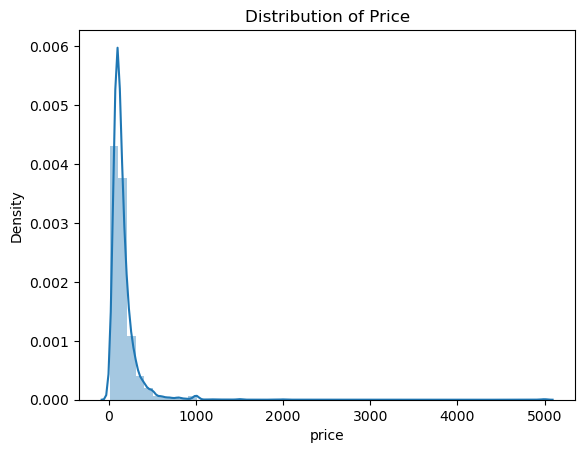

In [41]:
# Checking the distribution of the target variable
sns.distplot(data['price'])
plt.title('Distribution of Price')
plt.show()

### Deleting the observations with missing values

In [42]:
# checking the missing values
sum(data.isnull().sum())

27

In [43]:
# dropping the rows with missing values
data = data.dropna()


In [44]:
"""# Storing the cleaned data in a new csv file
data.to_csv('data_cleaned_2.csv', index=False)"""

# Splitting Data:
1. Target variable and the features
2. Test and Train Sets

In [45]:
# Splitting target variable and predictors
X = data.drop('price', axis=1)
y = data['price']

In [46]:
# checking for missing values in X
sum(X.isnull().sum())

0

In [47]:
from sklearn.model_selection import train_test_split

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
sum(X_train.isnull().sum())

0

* For linear regression it is necessary to scale the data.

In [49]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models

## LASSO - Feature Selection

* We have lots of features, which probably many of them are not important and deterministic in price prediction.
* We implement LASSO in the first step, to omit the unnecessary features.
* Then we run an OLS model on the remaining features.

In [50]:
# Avoiding the ConvergenceWarning
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

# implementing the LASSO method with the optimal regularization parameter
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

# Lasso- Parameter tuning using cross validation
alphas = np.logspace(-6, 2, 20)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

# Stoing the best lambda value
selected_alpha = lasso_cv.alpha_
print("Best lambda value: ", selected_alpha)

warnings.resetwarnings()

Best lambda value:  2.06913808111479


In [51]:
# Define the LASSO model using the best parameter
best_lasso_model = Lasso(alpha=selected_alpha)
best_lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=2.06913808111479)

In [52]:
# Checking the number of non-zero coefficients of the LASSO model
print("Number of non-zero coefficients: ", np.sum(best_lasso_model.coef_ != 0))

Number of non-zero coefficients:  234


In [53]:
# getting the features from the LASSO model that have a non-zero coefficient
selected_features = X.columns[best_lasso_model.coef_ != 0]
selected_features

Index(['accommodates', 'bedrooms', 'availability_30', 'number_of_reviews',
       'review_scores_rating', 'reviews_per_month', 'bathrooms',
       'host_has_profile_pic_t', 'host_identity_verified_t',
       'neighbourhood_cleansed_AFFORI',
       ...
       'HDTV with Netflix', 'Hangers', 'Host greets you', 'Hot water',
       'Kitchen', 'Outdoor dining area',
       'Paid folding or convertible high chair - available upon request',
       'Private living room', 'Qualsiasi shampoo', 'TV'],
      dtype='object', length=234)

In [65]:
# Choosing training and testing sets based on the selected features
X_train_selected = X_train_scaled[:, best_lasso_model.coef_ != 0]
X_test_selected = X_test_scaled[:, best_lasso_model.coef_ != 0]

In [55]:
# Implementing the OLS model with the selected features
import statsmodels.api as sm
X_train_selected = sm.add_constant(X_train_selected)
X_test_selected = sm.add_constant(X_test_selected)

# Fitting the OLS model
ols_model = sm.OLS(y_train, X_train_selected)
ols_model = ols_model.fit()

# Printing the summary of the OLS model
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     17.11
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:37:20   Log-Likelihood:            -1.1060e+05
No. Observations:               16339   AIC:                         2.216e+05
Df Residuals:                   16133   BIC:                         2.232e+05
Df Model:                         205                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        169.1616      1.659    101.976      0.0

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Creating a linear regression model
ols_model = LinearRegression()

# Fitting the model
ols_model.fit(X_train_selected, y_train)

# Checking the model performance on the training data
y_train_pred = ols_model.predict(X_train_selected)
ols_train_mse = mean_squared_error(y_train, y_train_pred)
ols_train_rmse = np.sqrt(ols_train_mse)
ols_train_mae = np.mean(np.abs(y_train - y_train_pred))
ols_train_r2 = ols_model.score(X_train_selected, y_train)
print('Training MSE:', ols_train_mse, '\n', 'Training RMSE:', ols_train_rmse,
      '\n', 'Training MAE:', ols_train_mae, '\n', 'Training R2:', ols_train_r2)

# Checking the model performance on the test data
y_test_pred = ols_model.predict(X_test_selected)
ols_test_mse = mean_squared_error(y_test, y_test_pred)
ols_test_rmse = np.sqrt(ols_test_mse)
ols_test_mae = np.mean(np.abs(y_test - y_test_pred))
ols_test_r2 = ols_model.score(X_test_selected, y_test)
print('Test MSE:', ols_test_mse, '\n', 'Test RMSE:', ols_test_rmse,
      '\n', 'Test MAE:', ols_test_mae, '\n', 'Test R2:', ols_test_r2)

Training MSE: 44395.99491136981 
 Training RMSE: 210.70357118798393 
 Training MAE: 80.47532660133352 
 Training R2: 0.1785376622416993
Test MSE: 5.710787255680626e+29 
 Test RMSE: 755697509303863.2 
 Test MAE: 23810629985602.543 
 Test R2: -1.789260024903142e+25


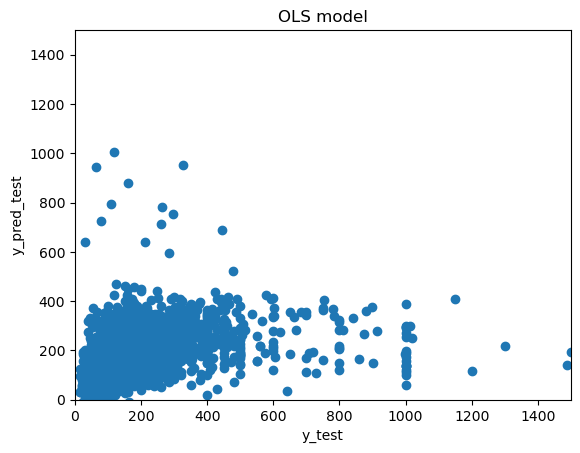

In [61]:
# Plotting the results of OLS prediction
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1500)
plt.ylim(0, 1500)
plt.title('OLS model')
plt.show()

In [62]:
# Running the OLS model with the all features from X_train
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fitting the OLS model
ols_model = sm.OLS(y_train, X_train)
ols_model = ols_model.fit()

# Printing the summary of the OLS model
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1.351
Date:                Mon, 27 Nov 2023   Prob (F-statistic):           3.34e-25
Time:                        22:43:29   Log-Likelihood:            -1.1034e+05
No. Observations:               16339   AIC:                         2.259e+05
Df Residuals:                   13726   BIC:                         2.460e+05
Df Model:                        2612                                         
Covariance Type:            nonrobust                                         
                                                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [63]:
# Running the OLS model with the all features from X_train_selected and log(y_train)
X_train_selected = sm.add_constant(X_train_selected)
X_test_selected = sm.add_constant(X_test_selected)

# Fitting the OLS model
ols_model = sm.OLS(np.log(y_train), X_train_selected)
ols_model = ols_model.fit()

# Printing the summary of the OLS model
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     59.60
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        22:43:40   Log-Likelihood:                -11654.
No. Observations:               16339   AIC:                         2.372e+04
Df Residuals:                   16133   BIC:                         2.531e+04
Df Model:                         205                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8586      0.004   1249.800      0.0

In [66]:
# Choosing training and testing sets based on the selected features
X_train_selected = X_train_scaled[:, best_lasso_model.coef_ != 0]
X_test_selected = X_test_scaled[:, best_lasso_model.coef_ != 0]

In [67]:
# Creating a linear regression model with log(y)
ols_model = LinearRegression()

# Fitting the model
ols_model.fit(X_train_selected, np.log(y_train))

# Checking the model performance on the training data
log_y_train_pred = ols_model.predict(X_train_selected)
ols_train_mse = mean_squared_error(np.log(y_train), log_y_train_pred)
ols_train_rmse = np.sqrt(ols_train_mse)
ols_train_mae = np.mean(np.abs(np.log(y_train) - log_y_train_pred))
ols_train_r2 = ols_model.score(X_train_selected, np.log(y_train))
print('Training MSE:', ols_train_mse, '\n', 'Training RMSE:', ols_train_rmse,
      '\n', 'Training MAE:', ols_train_mae, '\n', 'Training R2:', ols_train_r2)

# Checking the model performance on the test data
log_y_test_pred = ols_model.predict(X_test_selected)
ols_test_mse = mean_squared_error(np.log(y_test), log_y_test_pred)
ols_test_rmse = np.sqrt(ols_test_mse)
ols_test_mae = np.mean(np.abs(np.log(y_test) - log_y_test_pred))
ols_test_r2 = ols_model.score(X_test_selected, np.log(y_test))
print('Test MSE:', ols_test_mse, '\n', 'Test RMSE:', ols_test_rmse,
      '\n', 'Test MAE:', ols_test_mae, '\n', 'Test R2:', ols_test_r2)


Training MSE: 0.24386375178635747 
 Training RMSE: 0.4938256289282255 
 Training MAE: 0.3570154687944573 
 Training R2: 0.4308315308268471
Test MSE: 1.5300742861227663e+25 
 Test RMSE: 3911616400061.19 
 Test MAE: 132745710349.32434 
 Test R2: -3.634464071159649e+25


# Decision Tree Regression Model

In [68]:
from sklearn.tree import DecisionTreeRegressor
# Creating a decision tree regression model
dtree_model = DecisionTreeRegressor(random_state=42)

# Fitting the model to the training data
dtree_model.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = dtree_model.predict(X_train)
dtree_train_mse = mean_squared_error(y_train, y_train_pred)
dtree_train_rmse = np.sqrt(dtree_train_mse)
dtree_train_mae = np.mean(np.abs(y_train - y_train_pred))
dtree_train_r2 = dtree_model.score(X_train, y_train)
print('Training MSE:', dtree_train_mse, '\n', 'Training RMSE:', dtree_train_rmse,
      '\n', 'Training MAE:', dtree_train_mae, '\n', 'Training R2:', dtree_train_r2)

# Checking the model performance on the test data
y_test_pred = dtree_model.predict(X_test)
dtree_test_mse = mean_squared_error(y_test, y_test_pred)
dtree_test_rmse = np.sqrt(dtree_test_mse)
dtree_test_mae = np.mean(np.abs(y_test - y_test_pred))
dtree_test_r2 = dtree_model.score(X_test, y_test)
print('Test MSE:', dtree_test_mse, '\n', 'Test RMSE:', dtree_test_rmse,
      '\n', 'Test MAE:', dtree_test_mae, '\n', 'Test R2:', dtree_test_r2)

Training MSE: 0.48824897484546176 
 Training RMSE: 0.6987481483663923 
 Training MAE: 0.014627578187159557 
 Training R2: 0.9999909658935432
Test MSE: 44047.11425948593 
 Test RMSE: 209.8740437964779 
 Test MAE: 88.18347613219095 
 Test R2: -0.38005037183697965


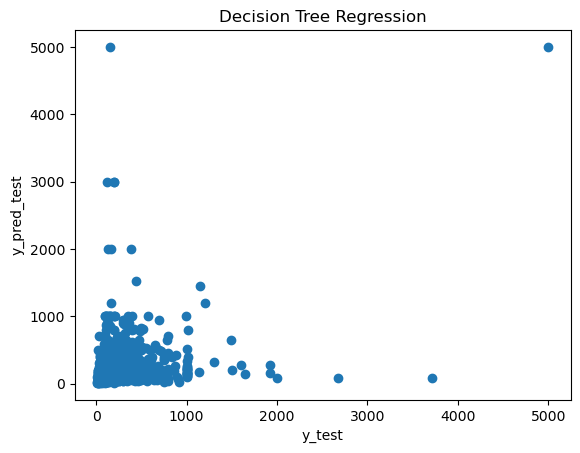

In [69]:
# Plotting the results from the default regression tree model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.title('Decision Tree Regression')
plt.show()

In [70]:
# defining the grid of parameters
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth': np.arange(3, 20), 'min_samples_leaf': np.arange(5, 20), 'min_samples_split': np.arange(5, 20)}

# defining the model
dtree_model_cv = DecisionTreeRegressor(random_state=42)

# defining the random search
dtree_cv = RandomizedSearchCV(dtree_model_cv, param_grid, cv = 5)

# fitting the model to the training data
dtree_cv.fit(X_train, y_train)
# storing the best parameters
best_params = dtree_cv.best_params_

# printing the best parameters
print("Tuned Decision Tree Parameters: {}".format(best_params))

Tuned Decision Tree Parameters: {'min_samples_split': 17, 'min_samples_leaf': 11, 'max_depth': 5}


In [71]:
# Creating a decision tree regression model with the best parameters
dtree_model_best = DecisionTreeRegressor(random_state=42, **best_params)

# Fitting the model to the training data
dtree_model_best.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = dtree_model_best.predict(X_train)
dtree_tuned_train_mse = mean_squared_error(y_train, y_train_pred)
dtree_tuned_train_rmse = np.sqrt(dtree_tuned_train_mse)
dtree_tuned_train_mae = np.mean(np.abs(y_train - y_train_pred))
dtree_tuned_train_r2 = dtree_model_best.score(X_train, y_train)
print('Training MSE:', dtree_tuned_train_mse, '\n', 'Training RMSE:', dtree_tuned_train_rmse,
      '\n', 'Training MAE:', dtree_tuned_train_mae, '\n', 'Training R2:', dtree_tuned_train_r2)

# Checking the model performance on the test data
y_test_pred = dtree_model_best.predict(X_test)
dtree_tuned_test_mse = mean_squared_error(y_test, y_test_pred)
dtree_tuned_test_rmse = np.sqrt(dtree_tuned_test_mse)
dtree_tuned_test_mae = np.mean(np.abs(y_test - y_test_pred))
dtree_tuned_test_r2 = dtree_model_best.score(X_test, y_test)
print('Test MSE:', dtree_tuned_test_mse, '\n', 'Test RMSE:', dtree_tuned_test_rmse,
      '\n', 'Test MAE:', dtree_tuned_test_mae, '\n', 'Test R2:', dtree_tuned_test_r2)

Training MSE: 47243.46034300324 
 Training RMSE: 217.3556080320985 
 Training MAE: 84.09690064508969 
 Training R2: 0.12585080130243698
Test MSE: 28457.432199646104 
 Test RMSE: 168.69330810570438 
 Test MAE: 81.79873497790761 
 Test R2: 0.10839357926405957


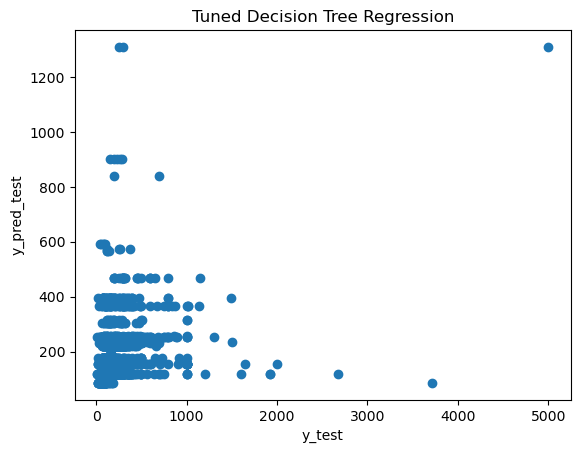

In [72]:
# Plotting the results from the Tuned regression tree model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.title('Tuned Decision Tree Regression')
plt.show()

C:\Users\PA\AppData\Local\Temp\ipykernel_21136\2438131990.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data['price']))


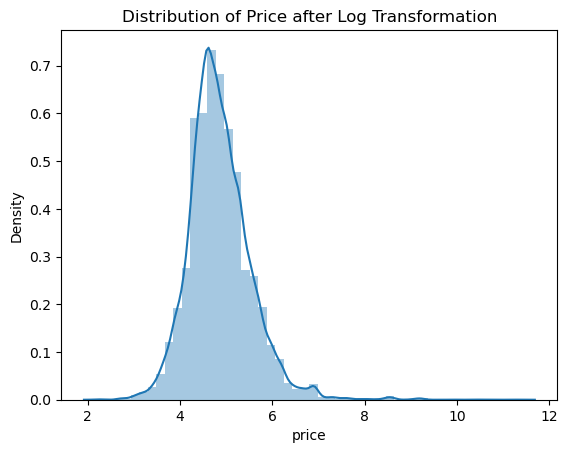

In [82]:
# Checking the distribution of the target variable after log transformation
sns.distplot(np.log(data['price']))
plt.title('Distribution of Price after Log Transformation')
plt.show()


# K-Nearest Neighbors (KNN) Regression

In [73]:
# Creating a KNN regression model
from sklearn.neighbors import KNeighborsRegressor


knn_model = KNeighborsRegressor()

# Fitting the model to the training data
knn_model.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = knn_model.predict(X_train)
knn_train_mse = mean_squared_error(y_train, y_train_pred)
knn_train_rmse = np.sqrt(knn_train_mse)
knn_train_mae = np.mean(np.abs(y_train - y_train_pred))
knn_train_r2 = knn_model.score(X_train, y_train)
print('Training MSE:', knn_train_mse, '\n', 'Training RMSE:', knn_train_rmse,
      '\n', 'Training MAE:', knn_train_mae, '\n', 'Training R2:', knn_train_r2)

# Checking the model performance on the test data
y_test_pred = knn_model.predict(X_test)
knn_test_mse = mean_squared_error(y_test, y_test_pred)
knn_test_rmse = np.sqrt(knn_test_mse)
knn_test_mae = np.mean(np.abs(y_test - y_test_pred))
knn_test_r2 = knn_model.score(X_test, y_test)
print('Test MSE:', knn_test_mse, '\n', 'Test RMSE:', knn_test_rmse,
      '\n', 'Test MAE:', knn_test_mae, '\n', 'Test R2:', knn_test_r2)

Training MSE: 38034.27279760083 
 Training RMSE: 195.02377495474963 
 Training MAE: 75.4935185751882 
 Training R2: 0.2962490713491679
Test MSE: 32715.677875152996 
 Test RMSE: 180.87475742942408 
 Test MAE: 87.67064871481027 
 Test R2: -0.025022505459150635


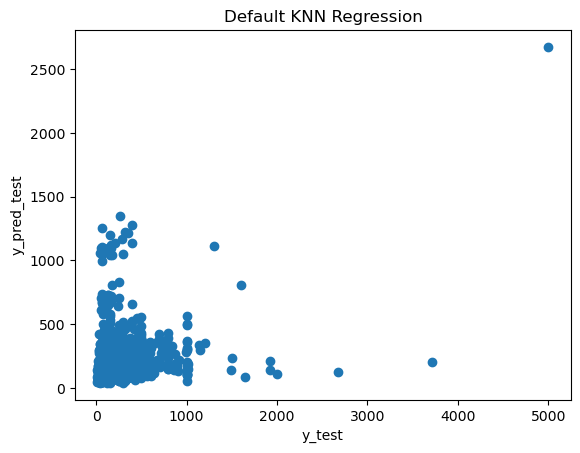

In [74]:
# Plotting the results from the Default KNN model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.title('Default KNN Regression')
plt.show()

# Tuned KNN Regression

In [75]:
# defining the grid of parameters
param_grid = {'n_neighbors': np.arange(1, 20), 'weights': ['uniform', 'distance']}

# defining the model
knn_model_cv = KNeighborsRegressor()

# defining the random search
knn_cv = RandomizedSearchCV(knn_model_cv, param_grid, cv = 5)

# fitting the model to the training data
knn_cv.fit(X_train, y_train)

# storing the best parameters
best_params = knn_cv.best_params_

In [76]:
# printing the best parameters
print("Tuned KNN Parameters: {}".format(best_params))

Tuned KNN Parameters: {'weights': 'distance', 'n_neighbors': 18}


In [77]:
# Creating a KNN regression model with the best parameters
knn_model_best = KNeighborsRegressor(**best_params)
# Fitting the model to the training data
knn_model_best.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = knn_model_best.predict(X_train)
knn_tuned_train_mse = mean_squared_error(y_train, y_train_pred)
knn_tuned_train_rmse = np.sqrt(knn_tuned_train_mse)
knn_tuned_train_mae = np.mean(np.abs(y_train - y_train_pred))
knn_tuned_train_r2 = knn_model_best.score(X_train, y_train)
print('Training MSE:', knn_tuned_train_mse, '\n', 'Training RMSE:', knn_tuned_train_rmse,
      '\n', 'Training MAE:', knn_tuned_train_mae, '\n', 'Training R2:', knn_tuned_train_r2)

# Checking the model performance on the test data
y_test_pred = knn_model_best.predict(X_test)
knn_tuned_test_mse = mean_squared_error(y_test, y_test_pred)
knn_tuned_test_rmse = np.sqrt(knn_tuned_test_mse)
knn_tuned_test_mae = np.mean(np.abs(y_test - y_test_pred))
knn_tuned_test_r2 = knn_model_best.score(X_test, y_test)
print('Test MSE:', knn_tuned_test_mse, '\n', 'Test RMSE:', knn_tuned_test_rmse,
      '\n', 'Test MAE:', knn_tuned_test_mae, '\n', 'Test R2:', knn_tuned_test_r2)

Training MSE: 0.488248976138244 
 Training RMSE: 0.6987481492914625 
 Training MAE: 0.014631468086355322 
 Training R2: 0.9999909658935193
Test MSE: 28519.224054995073 
 Test RMSE: 168.87635730023038 
 Test MAE: 83.66610636723368 
 Test R2: 0.10645756428590525


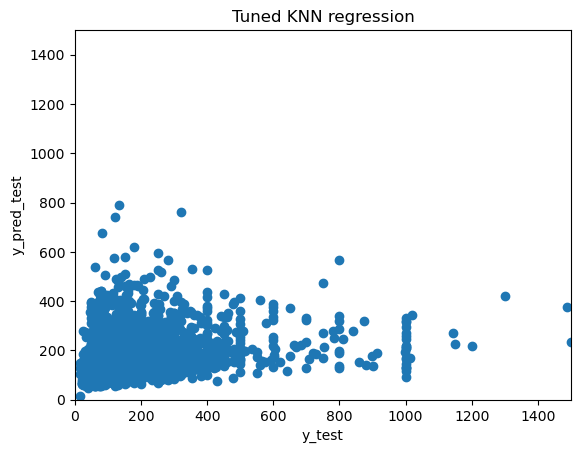

In [78]:
# Plotting the results from the Tuned KNN model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1500)
plt.ylim(0, 1500)
plt.title('Tuned KNN regression')
plt.show()

# Model 5: Random Forest Regression

In [79]:
# Creating a random forest regression model
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model to the training data
rf_model.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = rf_model.predict(X_train)
rf_train_mse = mean_squared_error(y_train, y_train_pred)
rf_train_rmse = np.sqrt(rf_train_mse)
rf_train_mae = np.mean(np.abs(y_train - y_train_pred))
rf_train_r2 = rf_model.score(X_train, y_train)
print('Training MSE:', rf_train_mse, '\n', 'Training RMSE:', rf_train_rmse, '\n', 'Training MAE:', rf_train_mae, '\n', 'Training R2:', rf_train_r2)

# Checking the model performance on the test data
y_test_pred = rf_model.predict(X_test)
rf_test_mse = mean_squared_error(y_test, y_test_pred)
rf_test_rmse = np.sqrt(rf_test_mse)
rf_test_mae = np.mean(np.abs(y_test - y_test_pred))
rf_test_r2 = rf_model.score(X_test, y_test)
print('Test MSE:', rf_test_mse, '\n', 'Test RMSE:', rf_test_rmse, '\n', 'Test MAE:', rf_test_mae, '\n', 'Test R2:', rf_test_r2)

Training MSE: 6444.397227363166 
 Training RMSE: 80.27700310402206 
 Training MAE: 28.32567924320717 
 Training R2: 0.8807588472248178
Test MSE: 24288.306347815007 
 Test RMSE: 155.84706076091075 
 Test MAE: 69.69560403916768 
 Test R2: 0.2390174300834258


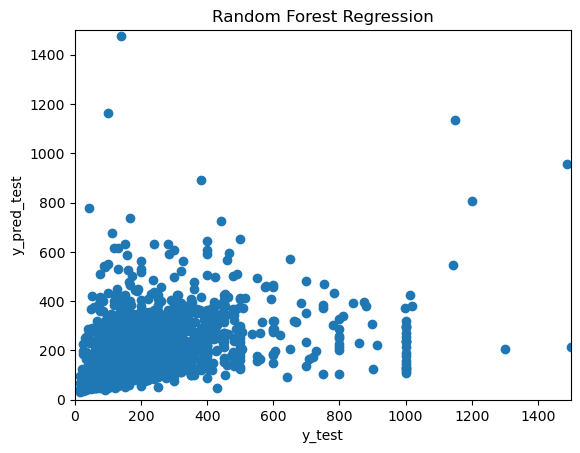

In [80]:
# Plotting the results from the Random Forest model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1500)
plt.ylim(0, 1500)
plt.title('Random Forest Regression')
plt.show()

In [90]:
"""# defining the grid of parameters
param_grid = {"n_estimators": np.arange(10, 400, 100), "max_features": ['sqrt'], 'bootstrap': [True, False]}

# defining the model
rf_model_cv = RandomForestRegressor(random_state=42)
# defining the random search
rf_cv = RandomizedSearchCV(rf_model_cv, param_grid, cv = 5)

# fitting the model to the training data
rf_cv.fit(X_train, y_train)

# storing the best parameters
best_params = rf_cv.best_params_

# printing the best parameters
print("Tuned Random Forest Parameters: {}".format(best_params))"""

c:\Users\PA\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Random Forest Parameters: {'n_estimators': 210, 'max_features': 'sqrt', 'bootstrap': False}


In [81]:
# Creating a random forest regression model with the best parameters
best_params = {'n_estimators': 210, 'max_features': 'sqrt', 'bootstrap': False}

rf_model_best = RandomForestRegressor(**best_params)

# Fitting the model to the training data
rf_model_best.fit(X_train, y_train)

# Checking the model performance on the training data
y_train_pred = rf_model_best.predict(X_train)
rf_tuned_train_mse = mean_squared_error(y_train, y_train_pred)
rf_tuned_train_rmse = np.sqrt(rf_tuned_train_mse)
rf_tuned_train_mae = np.mean(np.abs(y_train - y_train_pred))
rf_tuned_train_r2 = rf_model_best.score(X_train, y_train)
print('Training MSE:', rf_tuned_train_mse, '\n', 'Training RMSE:', rf_tuned_train_rmse,
      '\n', 'Training MAE:', rf_tuned_train_mae, '\n', 'Training R2:', rf_tuned_train_r2)

# Checking the model performance on the test data
y_test_pred = rf_model_best.predict(X_test)
rf_tuned_test_mse = mean_squared_error(y_test, y_test_pred)
rf_tuned_test_rmse = np.sqrt(rf_tuned_test_mse)
rf_tuned_test_mae = np.mean(np.abs(y_test - y_test_pred))
rf_tuned_test_r2 = rf_model_best.score(X_test, y_test)
print('Test MSE:', rf_tuned_test_mse, '\n', 'Test RMSE:', rf_tuned_test_rmse,
      '\n', 'Test MAE:', rf_tuned_test_mae, '\n', 'Test R2:', rf_tuned_test_r2)

Training MSE: 0.5220495616602693 
 Training RMSE: 0.722529972845604 
 Training MAE: 0.04536435625573798 
 Training R2: 0.9999903404788156
Test MSE: 20741.223027772194 
 Test RMSE: 144.0181343712388 
 Test MAE: 70.51425369322834 
 Test R2: 0.3501519217989103


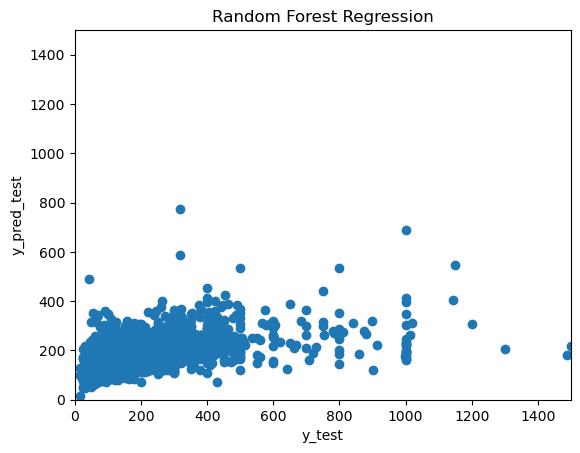

In [82]:
# Plotting the results from the Tuned Random Forest model
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred_test')
plt.xlim(0, 1500)
plt.ylim(0, 1500)
plt.title('Random Forest Regression')
plt.show()